<h1><center><b>⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐
<h1><center><b>CSE1905 - TECHNICAL ANSWERS TO REAL WORLD PROBLEMS<b></center></h1>
<h1><center><b>⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐

## ☔ **PART I -  TEXT GENERATION USING TEXT GENERATION AND DEEP LEARNING ALGORITHMS**



Note - 

Use data file 'wheat.txt' for the genes.ipynb. \
Use data file 'df.csv' for genes2.ipynb.

##🍏 **Installing required libraries and importing them**

In [1]:
import nltk
nltk.download('all')
!pip install bitstring

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 45 kB 2.4 MB/s 


In [2]:
!pip install deap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 139 kB 4.9 MB/s 


In [3]:
from __future__ import absolute_import, division,print_function, unicode_literals
  
import numpy as np
import tensorflow as tf
  
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM, GRU
from tensorflow.keras.optimizers import RMSprop
  
from keras.callbacks import LambdaCallback
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
import random
import sys

from deap import base, creator, tools, algorithms
from scipy.stats import bernoulli
from bitstring import BitArray

np.random.seed(1120)

##🍏 **Viewing the dataset**

In [4]:
with open('/content/wheat.txt','r') as file:
    text = file.read()
print(text)

"CCTAAACCTAAACCCTAAACCCTAAACCCTAAACCTAAACCTAAACCCTAAACCCTAAACCCTAAAACCC
"
"TAAACCCTAAACCTAAACCCTAAACCCTAAACCCTAAACCCTAAAACCTAAACCCTAAACCCTAAACCCT
"
"AAACCTAAACCCTAAACCCTAAACCTAAACCCTAAACCCTAAACCTAAACCCTAACCCTAAACCCTAAAC
"
"CCTAAACCCTAAAACCCTAAACCTAAACCCTAAAAACCCTAAAACCCTAAACCCTAAACCTAAACCCTAA
"
"ACCCTAAACCCTAAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCTAAACCCTAAACCTAAA
"
"CCCTAAACCCTAAACCCTAAACCTAAACCCTAAACCCTAAACCCTAAACCTAAACCCTAAAACCCTAAAC
"
"CCTAAACCCTAAACCCTAAACCCCCTAAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTA
"
"AACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCTAAACCTAAACCCTAACCCTAAACCTAAACC
"
"CTAAACCCTAAACCTAAACCCTAAACCCTAAACCCTAAACCAAACCTAAAAAAAACCCTAAACCCTAAAC
"
"CCAAACCACTAAATACCCCTAAACCCTAAACTAAACCCCCCTAACCCTAAAAAAAAAAAACCACTAAAAA
"
"CCCAAAACTAAACCCTAAACCCTAAAACCAAAACTAAAAAACCCTAAACCACCAAAACCAAACCAAACCC
"
"ATTAAAACCCCAAACCCAACCCTAAACCTAAAACAAACCTCCTAACCCTAAACCACTAAACCACTAAACC
"
"CCTAAACCACAACACCCCTAAACCCTAAACCCCTAAACCCTAAACCCTAAACCCTAAAAACTAAAACCAA
"
"AAACCTACCCCATAAAACCTATAAGCTAAACCATCAC

In [5]:
type(text)

str

##🍏 **Extracting only unique letters from the given data of genetic algorithms**

In [6]:
vocabulary = sorted(list(set(text)))
  
# Creating dictionaries to map each character to an index
char_to_indices = dict((c, i) for i, c in enumerate(vocabulary))
indices_to_char = dict((i, c) for i, c in enumerate(vocabulary))
  
print(vocabulary)

['\n', '"', 'A', 'C', 'G', 'T']


##🍏**In this segment, we try to extract the whole text file into different lists and then, what we do is that-**

### In X, there lies the list of sequences with a definite max length specified. 
### In Y, lies the next char that split from the rest of the array

In [7]:
max_length = 100
steps = 5
sentences = []
next_chars = []
for i in range(0, len(text) - max_length, steps):
    sentences.append(text[i: i + max_length])
    next_chars.append(text[i + max_length])
      
# Hot encoding each character into a boolean vector
  
# Initializing a matrix of boolean vectors with each column representing
# the hot encoded representation of the character
X = np.zeros((len(sentences), max_length, len(vocabulary)), dtype = bool)
y = np.zeros((len(sentences), len(vocabulary)), dtype = bool)
  
# Placing the value 1 at the appropriate position for each vector
# to complete the hot-encoding process
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
         X[i, t, char_to_indices[char]] = 1
    y[i, char_to_indices[next_chars[i]]] = 1
        

##🍏 **Configuring the Gated Recurrent Unit as mentioned in the report**

In [8]:
model = Sequential()
  
# Defining the cell type
model.add(GRU(64, input_shape =(max_length, len(vocabulary))))
  
# Defining the densely connected Neural Network layer
model.add(Dense(len(vocabulary)))
  
# Defining the activation function for the cell
model.add(Activation('softmax'))
  
# Defining the optimizing function
optimizer = RMSprop(learning_rate = 0.01)
  
# Configuring the model for training
model.compile(loss ='categorical_crossentropy', optimizer = optimizer)

##🍏 **As given in the official sequence generation documentation by Deap and Biopython (feature active at the time of making the project, however deprecated as of Nov 2022), below is the code for generating a sequence from scratch.**

In [9]:
def sample_index(preds, t = 1.0):
# temperature determines the freedom the function has when generating text
  
    # Converting the predictions vector into a numpy array
    preds = np.asarray(preds).astype('float64')
  
    # Normalizing the predictions array
    preds = np.log(preds) / t
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
  
    # The main sampling step. Creates an array of probabilities signifying
    # the probability of each character to be the next character in the 
    # generated text
    probas = np.random.multinomial(1, preds, 1)
  
    # Returning the character with maximum probability to be the next character
    # in the generated text
    return np.argmax(probas)

##🍏 **Generating the sequence as given above**

- Using diversity variable to allot temperature factor for generating sequences based on probabilities within the randomness of the sequence extracted

In [10]:
newsen = []
epochs = 3
batch_size = 64

for epoch in range(epochs):
    model.fit(X, y, batch_size=batch_size, epochs=1)
    print()
    print("Epoch No: %d" % epoch)

    start_index = random.randint(0, len(text) - max_length - 1)
    for diversity in [0.2, 0.5, 1.0]:
        print("Diversity:", diversity)

        generated = ""
        sentence = text[start_index : start_index + max_length]

        for i in range(400):
            x_pred = np.zeros((1, max_length, len(vocabulary)))
            for t, char in enumerate(sentence):
                x_pred[0, t, char_to_indices[char]] = 1.0
            preds = model.predict(x_pred, verbose=0)[0]
            next_index = sample_index(preds, diversity)
            next_char = indices_to_char[next_index]
            sentence = sentence[1:] + next_char
            generated += next_char
        newsen.append(generated)

        print("Generated: ", generated)
        print()

  

137/137 [==============================] - 9s 10ms/step - loss: 1.2219

Epoch No: 0
Diversity: 0.2
Generated:  GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG

Diversity: 0.5
Generated:  GGGGGGGGGGGGGGAGGGGGGGGGGGGGGGGGGGGGGGGGGGGAGGGGGGAGGTAGTATTTGGGGGGGGAG
"
"GGAGGGGGGGGTGGGGGGGGGGGAGGGGGTGGTGAGGTGGTGGATGGGGGGGGGGGTGGGGGGTGGAAGGGGGGGGGGGGGGGGGTGTGGGGGGTGTGGGGGGTGGGGGGAGTTTTTGGGAACTGGGGGGGAGGGGAGAAGGGAGGAAGGGGAGAGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGTGGGGGGGGGTAGGGGGAGGGGGGGGGCGGGGGCCGGGGGTGGGAAGGGGGGGGGGGGGGTGGAGGTGGGCGTGGAGTGGTGGGGGAGATGGCTGACACTTAGTGAGTGGGAGGGGGGGGGGGGGGGGCAGGGTGA

Diversity: 1.0
Generated:  GTAGAAAAATGTTAAGCTTTA
"TATTTAGG

##🍏 **Biopython library usage**

In [11]:
!pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.1 MB 4.6 MB/s 


In [12]:
!pip install nglview
import Bio
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO
from Bio import AlignIO
from Bio.pairwise2 import format_alignment 
from Bio.Align import MultipleSeqAlignment
from Bio.Blast import NCBIWWW
from Bio.SeqUtils.ProtParam import ProteinAnalysis
from Bio.Data import CodonTable
import nglview as nv
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.7 MB 4.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.6 MB 53.3 MB/s 
  Created wheel for nglview: filename=nglview-3.0.3-py3-none-any.whl size=8057549 sha256=5238ee280b0610dc6607a352d4bb97ac3e7db0c87c175946879567c720707ecd
  Stored in directory: /root/.cache/pip/wheels/83/a4/c3/283e7ba3ea501b8fb6fb4acc8f11d6aada1f1640d794db0c41
Successfully built nglview


/usr/local/lib/python3.8/dist-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


##🍏 **Reading datasets using Biopython**

In [14]:
goss = SeqIO.read("/content/sequence (1).fasta", "fasta")
goss

SeqRecord(seq=Seq('TGGGCGAACGACGGGAATTGAACCCGCGCATGGTGGATTCACAATCCACTGCCT...ATT'), id='MK792867.1', name='MK792867.1', description='MK792867.1 Gossypium hirsutum f. palmeri chloroplast, complete genome', dbxrefs=[])

In [15]:
len(goss)

160418

##🍏 **Mini data analysis**

In [16]:
all_freq = {}
  
for i in text:
    if i in all_freq:
        all_freq[i] += 1
    else:
        all_freq[i] = 1
  #printing result 
print ("Count of all characters in GeeksforGeeks is :\n "
                                        +  str(all_freq))

Count of all characters in GeeksforGeeks is :
 {'"': 1182, 'C': 9643, 'T': 10088, 'A': 16341, '\n': 1182, 'G': 5257}


In [17]:
all_freq
all_freq.pop('\n')

1182

In [18]:
all_freq

{'"': 1182, 'C': 9643, 'T': 10088, 'A': 16341, 'G': 5257}

In [19]:
import pandas as pd
ndf = pd.DataFrame.from_dict(all_freq, orient ='index')
ndf = ndf.reset_index()
ndf = ndf.rename(columns={"index": "Nucleotide", 0: "Composition"})

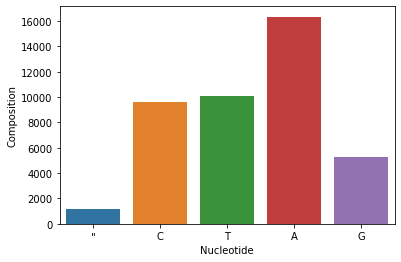

In [20]:
ax = sns.barplot(x="Nucleotide", y="Composition", data=ndf)

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

In [22]:
len(sentences)

8719

##🍏 **Rename x as sentences and y as next_char; we had obtained x and y previously.**

In [23]:
sentences = np.array(sentences)
next_chars = np.array(next_chars)

In [24]:
sentences

array(['"CCTAAACCTAAACCCTAAACCCTAAACCCTAAACCTAAACCTAAACCCTAAACCCTAAACCCTAAAACCC\n"\n"TAAACCCTAAACCTAAACCCTAAAC',
       'AACCTAAACCCTAAACCCTAAACCCTAAACCTAAACCTAAACCCTAAACCCTAAACCCTAAAACCC\n"\n"TAAACCCTAAACCTAAACCCTAAACCCTAA',
       'AAACCCTAAACCCTAAACCCTAAACCTAAACCTAAACCCTAAACCCTAAACCCTAAAACCC\n"\n"TAAACCCTAAACCTAAACCCTAAACCCTAAACCCT',
       ...,
       'ATG\n"\n"AAGAAGGGGATTTCAATGTCCTGCTGTAGTAAAAGAAAGGAGGAAGAGAAATAATATAAAAACAAAAGAA\n"\n"AAAGAAGGGTAAAGTAACA',
       '\n"AAGAAGGGGATTTCAATGTCCTGCTGTAGTAAAAGAAAGGAGGAAGAGAAATAATATAAAAACAAAAGAA\n"\n"AAAGAAGGGTAAAGTAACACCCTT',
       'AAGGGGATTTCAATGTCCTGCTGTAGTAAAAGAAAGGAGGAAGAGAAATAATATAAAAACAAAAGAA\n"\n"AAAGAAGGGTAAAGTAACACCCTTACCCG'],
      dtype='<U100')

In [25]:
a = sentences
b = next_chars

In [26]:
for i in sentences:
    print(i)

Streaming output truncated to the last 5000 lines.
AAAC
"
"AATAAGAAATATGTTTCAAGTTAACCATCAACAAATAATACCAAGCATGTTACAGGCAAAGTTGAAGGAA
"
"AAGAAAGTCATCATGATC
"
"AATAAGAAATATGTTTCAAGTTAACCATCAACAAATAATACCAAGCATGTTACAGGCAAAGTTGAAGGAA
"
"AAGAAAGTCATCATGATCAAAGT
TAAGAAATATGTTTCAAGTTAACCATCAACAAATAATACCAAGCATGTTACAGGCAAAGTTGAAGGAA
"
"AAGAAAGTCATCATGATCAAAGTGTAGC
AATATGTTTCAAGTTAACCATCAACAAATAATACCAAGCATGTTACAGGCAAAGTTGAAGGAA
"
"AAGAAAGTCATCATGATCAAAGTGTAGCAAGTA
GTTTCAAGTTAACCATCAACAAATAATACCAAGCATGTTACAGGCAAAGTTGAAGGAA
"
"AAGAAAGTCATCATGATCAAAGTGTAGCAAGTAAAGCA
AAGTTAACCATCAACAAATAATACCAAGCATGTTACAGGCAAAGTTGAAGGAA
"
"AAGAAAGTCATCATGATCAAAGTGTAGCAAGTAAAGCAGCATT
AACCATCAACAAATAATACCAAGCATGTTACAGGCAAAGTTGAAGGAA
"
"AAGAAAGTCATCATGATCAAAGTGTAGCAAGTAAAGCAGCATTGAACA
TCAACAAATAATACCAAGCATGTTACAGGCAAAGTTGAAGGAA
"
"AAGAAAGTCATCATGATCAAAGTGTAGCAAGTAAAGCAGCATTGAACATATTT
AAATAATACCAAGCATGTTACAGGCAAAGTTGAAGGAA
"
"AAGAAAGTCATCATGATCAAAGTGTAGCAAGTAAAGCAGCATTGAACATATTTTGCAA
ATACCAAGCATGTTACAGGCAAAGTTGAAGGAA
"
"AAG

In [27]:
len(a) == len(b)

True

##🍏 **Converting them into a dataset for more efficient usage**

In [28]:
newdf = [a,b]
import pandas as pd
df = pd.DataFrame(newdf)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,8709,8710,8711,8712,8713,8714,8715,8716,8717,8718
0,"""CCTAAACCTAAACCCTAAACCCTAAACCCTAAACCTAAACCTAAA...",AACCTAAACCCTAAACCCTAAACCCTAAACCTAAACCTAAACCCTA...,AAACCCTAAACCCTAAACCCTAAACCTAAACCTAAACCCTAAACCC...,CTAAACCCTAAACCCTAAACCTAAACCTAAACCCTAAACCCTAAAC...,CCCTAAACCCTAAACCTAAACCTAAACCCTAAACCCTAAACCCTAA...,AACCCTAAACCTAAACCTAAACCCTAAACCCTAAACCCTAAAACCC...,"TAAACCTAAACCTAAACCCTAAACCCTAAACCCTAAAACCC\n""\n...","CTAAACCTAAACCCTAAACCCTAAACCCTAAAACCC\n""\n""TAAA...","CCTAAACCCTAAACCCTAAACCCTAAAACCC\n""\n""TAAACCCTA...","ACCCTAAACCCTAAACCCTAAAACCC\n""\n""TAAACCCTAAACCT...",...,"GTAGAATTGAAAATCATACCTGAAATTGCAATCCGATG\n""\n""AA...","ATTGAAAATCATACCTGAAATTGCAATCCGATG\n""\n""AAGAAGG...","AAATCATACCTGAAATTGCAATCCGATG\n""\n""AAGAAGGGGATT...","ATACCTGAAATTGCAATCCGATG\n""\n""AAGAAGGGGATTTCAAT...","TGAAATTGCAATCCGATG\n""\n""AAGAAGGGGATTTCAATGTCCT...","TTGCAATCCGATG\n""\n""AAGAAGGGGATTTCAATGTCCTGCTGT...","ATCCGATG\n""\n""AAGAAGGGGATTTCAATGTCCTGCTGTAGTAA...","ATG\n""\n""AAGAAGGGGATTTCAATGTCCTGCTGTAGTAAAAGAA...","\n""AAGAAGGGGATTTCAATGTCCTGCTGTAGTAAAAGAAAGGAGG...",AAGGGGATTTCAATGTCCTGCTGTAGTAAAAGAAAGGAGGAAGAGA...
1,C,A,A,C,A,A,T,C,A,\n,...,A,A,A,"""",A,T,T,C,A,\n


In [29]:
df = df.T

df.columns = ['Sentences','NextChar']
df.head()

,Sentences,NextChar
0,"""CCTAAACCTAAACCCTAAACCCTAAACCCTAAACCTAAACCTAAA...",C
1,AACCTAAACCCTAAACCCTAAACCCTAAACCTAAACCTAAACCCTA...,A
2,AAACCCTAAACCCTAAACCCTAAACCTAAACCTAAACCCTAAACCC...,A
3,CTAAACCCTAAACCCTAAACCTAAACCTAAACCCTAAACCCTAAAC...,C
4,CCCTAAACCCTAAACCTAAACCTAAACCCTAAACCCTAAACCCTAA...,A


In [30]:
df = df.replace('\n','G', regex=True)

In [31]:
df.head()

,Sentences,NextChar
0,"""CCTAAACCTAAACCCTAAACCCTAAACCCTAAACCTAAACCTAAA...",C
1,AACCTAAACCCTAAACCCTAAACCCTAAACCTAAACCTAAACCCTA...,A
2,AAACCCTAAACCCTAAACCCTAAACCTAAACCTAAACCCTAAACCC...,A
3,CTAAACCCTAAACCCTAAACCTAAACCTAAACCCTAAACCCTAAAC...,C
4,CCCTAAACCCTAAACCTAAACCTAAACCCTAAACCCTAAACCCTAA...,A


In [32]:
df.to_csv('/content/file1.csv')

In [33]:
df.to_csv('/content/df.csv')

##🍏 **Text generation using GPT-Neo**

#### Trying to generate text using df dataframe

In [1]:
import pandas as pd

df = pd.read_csv('/content/df.csv')
df.head()

,Unnamed: 0,Sentences,NextChar
0,0,"""CCTAAACCTAAACCCTAAACCCTAAACCCTAAACCTAAACCTAAA...",C
1,1,AACCTAAACCCTAAACCCTAAACCCTAAACCTAAACCTAAACCCTA...,A
2,2,AAACCCTAAACCCTAAACCCTAAACCTAAACCTAAACCCTAAACCC...,A
3,3,CTAAACCCTAAACCCTAAACCTAAACCTAAACCCTAAACCCTAAAC...,C
4,4,CCCTAAACCCTAAACCTAAACCTAAACCCTAAACCCTAAACCCTAA...,A


In [2]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df["Sentences"],df["NextChar"],test_size = 0.3)

In [3]:
!pip install transformers  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##🍏 **Invoking GPT-Neo**

In [4]:
from transformers import pipeline
generator = pipeline('text-generation', model='EleutherAI/gpt-neo-1.3B')

Downloading:   0%|          | 0.00/200 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

In [5]:
prompt = x_train[5]
res = generator(prompt, max_length=300, do_sample=True, temperature=0.5)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [6]:
new = res[0]['generated_text']
len(new)

525

##🍏 **Resultant text generated**

In [7]:
new

'AACCCTAAACCTAAACCTAAACCCTAAACCCTAAACCCTAAAACCCG"G"TAAACCCTAAACCTAAACCCTAAACCCTAAACCCTAAACCCTAAAACCTAACCCTAAACCTAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAAACCCTAA'

## ♉ Part 2 of the code can be found in the notebook known as genes2.ipynb.